In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os, shutil

In [2]:
dataset_dir = "D:/dataset"

In [3]:
base_dir = "D:/dataset/malaria_using_cnn"
os.mkdir(base_dir)

In [4]:
# Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
# Directory with training parasitized pictures

train_parasitized_dir = os.path.join(train_dir, 'parasitized')
os.mkdir(train_parasitized_dir)

In [6]:
# Directory with training uninfected pictures

train_uninfected_dir = os.path.join(train_dir, 'uninfected')
os.mkdir(train_uninfected_dir)

In [7]:
# Directory with validationing parasitized pictures

validation_parasitized_dir = os.path.join(validation_dir, 'parasitized')
os.mkdir(validation_parasitized_dir)

In [8]:
# Directory with validation uninfected pictures

validation_uninfected_dir = os.path.join(validation_dir, 'uninfected')
os.mkdir(validation_uninfected_dir)

In [9]:
# Directory with test parasitized pictures

test_parasitized_dir = os.path.join(test_dir, 'parasitized')
os.mkdir(test_parasitized_dir)

In [10]:
# Directory with test uninfected pictures

test_uninfected_dir = os.path.join(test_dir, 'uninfected')
os.mkdir(test_uninfected_dir)

In [11]:
# Copies the first 1000 parasitized images to train_parasitized_dir

fnames = ['parasitized.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_parasitized_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copies the 500 parasitized images to validation_parasitized_dir
fnames = ['parasitized.{}.jpg'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_parasitized_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
#  Copies the next 500 parasitized images to test_parasitized_dir

fnames = ['parasitized.{}.jpg'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_parasitized_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copies the first 400 uninfected images to train_uninfected_dir

fnames = ['uninfected.{}.jpg'.format(i) for i in range(1, 1001)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(train_uninfected_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 250 uninfected images to validation_uninfected_dir    

fnames = ['uninfected.{}.jpg'.format(i) for i in range(1001, 1501)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(validation_uninfected_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 250 uninfected images to test_uninfected_dir    

fnames = ['uninfected.{}.jpg'.format(i) for i in range(1501, 2001)]
for fname in fnames:
    src = os.path.join(dataset_dir, fname)
    dst = os.path.join(test_uninfected_dir, fname)
    shutil.copyfile(src, dst)

# Building network
Instantiating a small convnet for parasitized vs uninfected malaria classification

In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Configuring the model for training

In [16]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Using ImageDataGenerator to read images from directories

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
         target_size=(150, 150),
         batch_size=20,
         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Fitting the model using a batch generator

In [18]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 92s 918ms/step - loss: 0.6476 - acc: 0.6095 - val_loss: 0.6378 - val_acc: 0.7690
Epoch 2/30
100/100 [==============================] - 95s 950ms/step - loss: 0.5259 - acc: 0.7525 - val_loss: 0.5513 - val_acc: 0.8020
Epoch 3/30
100/100 [==============================] - 97s 970ms/step - loss: 0.4698 - acc: 0.7885 - val_loss: 0.6677 - val_acc: 0.8080
Epoch 4/30
100/100 [==============================] - 100s 996ms/step - loss: 0.4144 - acc: 0.8255 - val_loss: 0.3435 - val_acc: 0.8140
Epoch 5/30
100/100 [==============================] - 101s 1s/step - loss: 0.3488 - acc: 0.8585 - val_loss: 0.3742 - val_acc: 0.8310
Epoch 6/30
100/100 [==============================] - 5809s 58s/step - loss: 0.2758 - acc: 0.8915 - val_loss: 0.2403 - val_acc: 0.8710
Epoch 7/30
100/100 [==============================] - 88s 881ms/step - loss: 0.2331 - acc: 0.9110 - val_loss: 0.2588 - val_acc: 0.8840
Epoch 8/30
100/100 [==============================] - 79

In [19]:
# Saving the model

model.save('parasitized_vs_uninfected_using_cnn.h5')

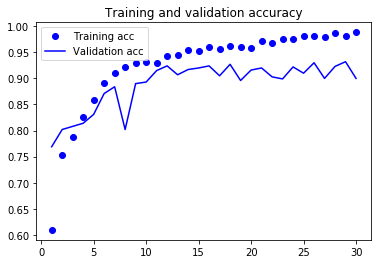

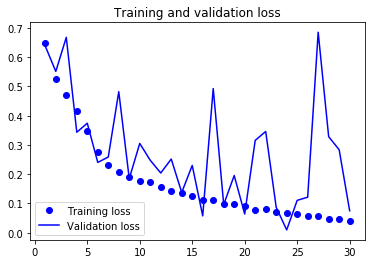

In [20]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()